# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.1'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
The New York Times (2020), https://github.com/nytimes/covid-19-data
Open Government Data, Liechtenstein (2020), https://github.com/openZH/covid

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
The New York Times (2020), https://github.com/nytimes/covid-19-data
Open Government Data, Liechtenstein (2020), https://github.com/openZH/covid

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
192821,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192822,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192823,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192824,2020-08-30,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192825,2020-08-31,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
192821,2020-08-27,Colombia,Vichada,14,2,0,12
192822,2020-08-28,Colombia,Vichada,14,2,0,12
192823,2020-08-29,Colombia,Vichada,14,2,0,12
192824,2020-08-30,Colombia,Vichada,14,2,0,12
192825,2020-08-31,Colombia,Vichada,14,2,0,12


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
161,2020-08-27,20096,3047,356,16693
162,2020-08-28,20322,2959,358,17005
163,2020-08-29,20569,2800,358,17411
164,2020-08-30,20717,2827,360,17530
165,2020-08-31,20817,2784,363,17670


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-27,24359363,7604654,832312,15922397,0.017084,0.326823,0.049676
2020-08-28,24632492,7675935,837688,16118869,0.017004,0.327187,0.049402
2020-08-29,24891503,7719231,842742,16329530,0.016928,0.328014,0.049076
2020-08-30,25103017,7724480,846341,16532196,0.016857,0.329287,0.048700
2020-08-31,25103489,7724138,846356,16532995,0.016857,0.329297,0.048699


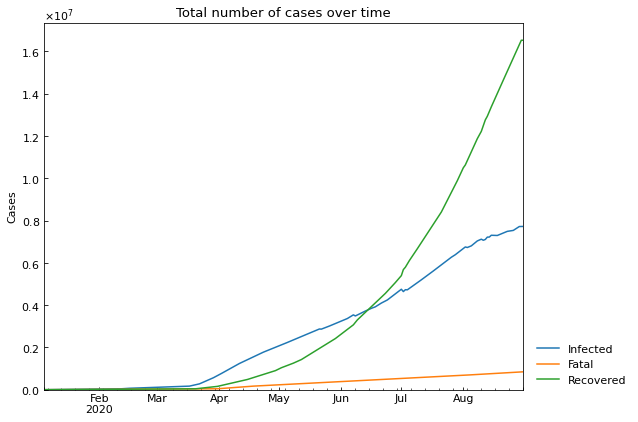

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
200,2020-08-27,65682,11636,1240,52806
201,2020-08-28,66558,11322,1260,53976
202,2020-08-29,67401,10809,1271,55321
203,2020-08-30,68000,10571,1285,56144
204,2020-08-31,68437,10351,1299,56787


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
198,2020-08-27,64668,10619,1226,52823
199,2020-08-28,65573,10340,1238,53995
200,2020-08-29,66423,9827,1255,55341
201,2020-08-30,67264,9836,1264,56164
202,2020-08-31,67865,9784,1279,56802


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
192821,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192822,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192823,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192824,2020-08-30,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192825,2020-08-31,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
189141,COL,Colombia,Vichada,2020-08-27,107808
189142,COL,Colombia,Vichada,2020-08-28,107808
189143,COL,Colombia,Vichada,2020-08-29,107808
189144,COL,Colombia,Vichada,2020-08-30,107808
189145,COL,Colombia,Vichada,2020-08-31,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
192821,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192822,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192823,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192824,2020-08-30,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
192825,2020-08-31,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
192821,2020-08-27,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
192822,2020-08-28,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
192823,2020-08-29,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
192824,2020-08-30,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
192825,2020-08-31,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
236,2020-08-27,1,1,1,0,0,1,1,3,2,1,2,30.56
237,2020-08-28,1,1,1,0,0,1,1,3,2,1,2,30.56
238,2020-08-29,1,1,1,0,0,1,1,3,2,1,2,30.56
239,2020-08-30,1,1,1,0,0,1,1,3,2,1,2,30.56
240,2020-08-31,1,1,1,0,0,1,1,3,2,1,2,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
236,2020-08-27,1,1,1,0,0,1,1,3,2,1,2,30.56
237,2020-08-28,1,1,1,0,0,1,1,3,2,1,2,30.56
238,2020-08-29,1,1,1,0,0,1,1,3,2,1,2,30.56
239,2020-08-30,1,1,1,0,0,1,1,3,2,1,2,30.56
240,2020-08-31,1,1,1,0,0,1,1,3,2,1,2,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

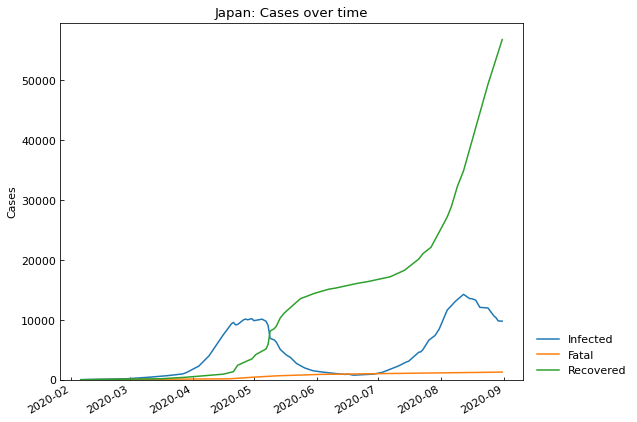

,Date,Confirmed,Infected,Fatal,Recovered
198,2020-08-27,64668,10619,1226,52823
199,2020-08-28,65573,10340,1238,53995
200,2020-08-29,66423,9827,1255,55341
201,2020-08-30,67264,9836,1264,56164
202,2020-08-31,67865,9784,1279,56802


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

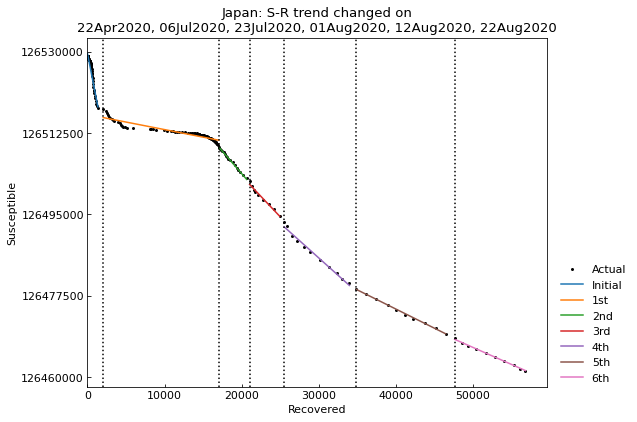

,Type,Start,End,Population
1st,Past,22Apr2020,05Jul2020,126529100
2nd,Past,06Jul2020,22Jul2020,126529100
3rd,Past,23Jul2020,31Jul2020,126529100
4th,Past,01Aug2020,11Aug2020,126529100
5th,Past,12Aug2020,21Aug2020,126529100
6th,Past,22Aug2020,31Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	6th phase (22Aug2020 - 31Aug2020): finished  296 trials in 0 min 10 sec

	3rd phase (23Jul2020 - 31Jul2020): finished  494 trials in 0 min 20 sec

	5th phase (12Aug2020 - 21Aug2020): finished  286 trials in 0 min 10 sec

	4th phase (01Aug2020 - 11Aug2020): finished  739 trials in 0 min 30 sec

	2nd phase (06Jul2020 - 22Jul2020): finished 1521 trials in 1 min  0 sec

	1st phase (22Apr2020 - 05Jul2020): finished 1457 trials in 1 min  0 sec

Completed optimization. Total: 1 min 10 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/beta [day],1/alpha2 [day],alpha1 [-],RMSLE,Trials,Runtime
1st,Past,22Apr2020,05Jul2020,126529100,SIR-F,0.45,0.071072,0.000216,0.013200,0.026871,480,12,25,1544,0.071,1.045264,1457,1 min 0 sec
2nd,Past,06Jul2020,22Jul2020,126529100,SIR-F,2.02,0.000248,0.000081,0.044191,0.021805,480,15,7,4125,0.000,0.029667,1521,1 min 0 sec
3rd,Past,23Jul2020,31Jul2020,126529100,SIR-F,1.89,0.000250,0.000076,0.046174,0.024298,480,13,7,4393,0.000,0.033084,494,0 min 20 sec
4th,Past,01Aug2020,11Aug2020,126529100,SIR-F,1.58,0.000158,0.000060,0.036220,0.022898,480,14,9,5586,0.000,0.050473,739,0 min 30 sec
5th,Past,12Aug2020,21Aug2020,126529100,SIR-F,0.82,0.000120,0.000229,0.026704,0.032246,480,10,12,1458,0.000,0.012686,286,0 min 10 sec
6th,Past,22Aug2020,31Aug2020,126529100,SIR-F,0.75,0.002650,0.000235,0.026829,0.035474,480,9,12,1416,0.003,0.023621,296,0 min 10 sec


### Accuracy of estimation

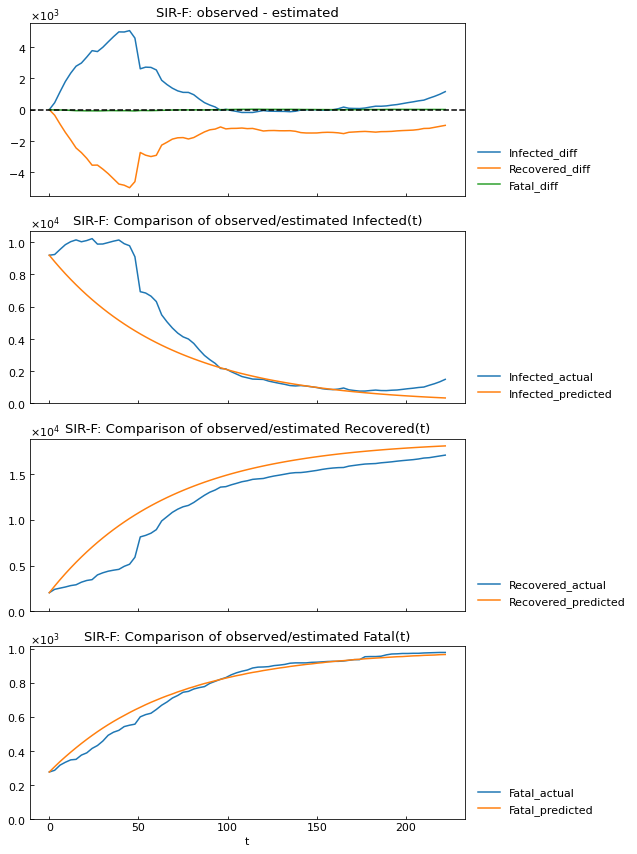

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.58

### Show parameter history

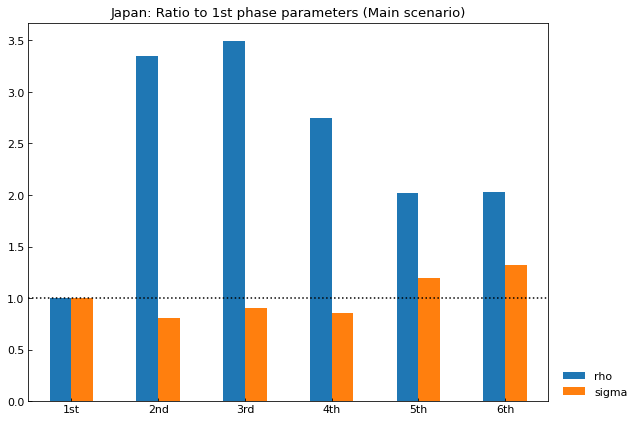

,1st,2nd,3rd,4th,5th,6th
rho,1.0,3.347674,3.497901,2.743806,2.022957,2.032423
sigma,1.0,0.811471,0.904235,0.852149,1.200047,1.320162


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

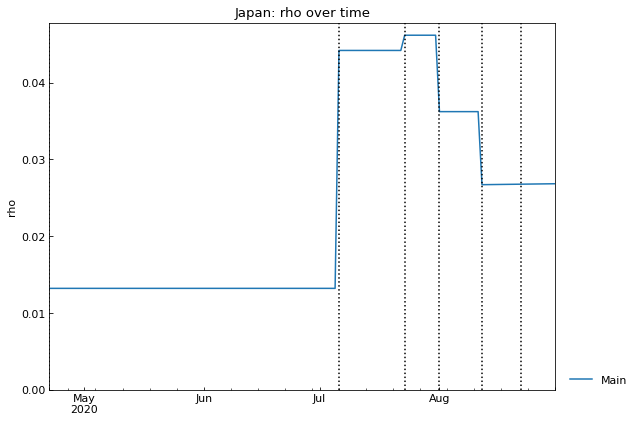

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

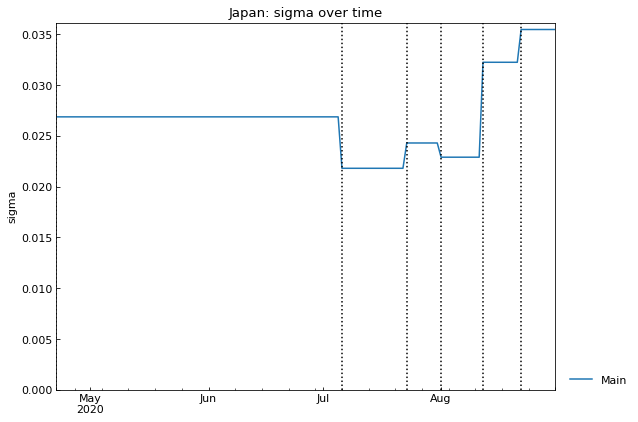

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

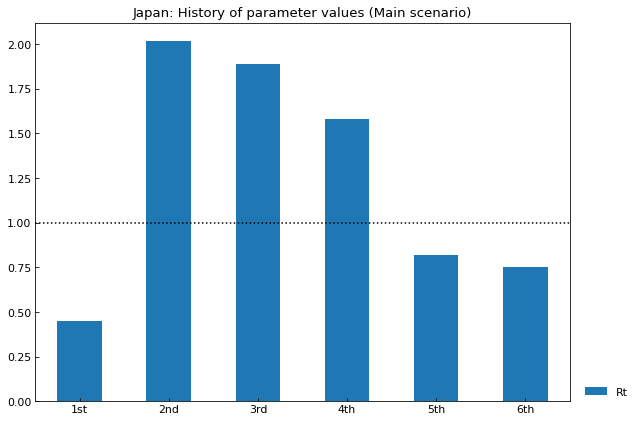

,1st,2nd,3rd,4th,5th,6th
Rt,0.45,2.02,1.89,1.58,0.82,0.75


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

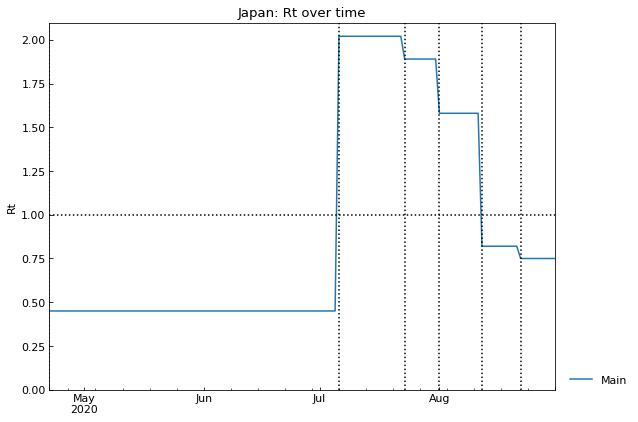

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

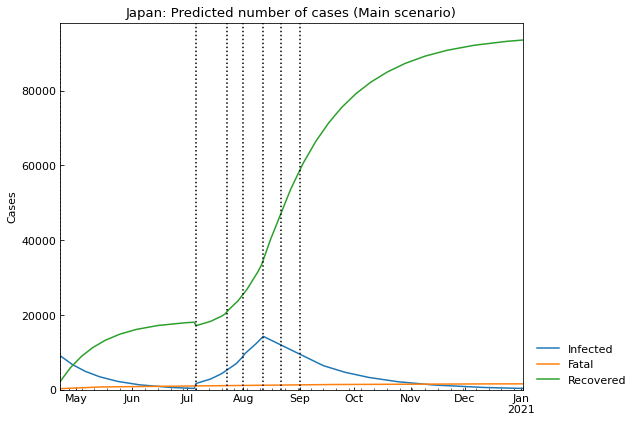

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,95323,1564,372,93387
252,2020-12-30,95353,1564,363,93426
253,2020-12-31,95382,1565,353,93464
254,2021-01-01,95410,1565,344,93501
255,2021-01-02,95437,1565,335,93537


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.03547400730281173

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.07094801460562346

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.45   
         2nd      Past  06Jul2020  22Jul2020   126529100  SIR-F  2.02   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.89   
         4th      Past  01Aug2020  11Aug2020   126529100  SIR-F  1.58   
         5th      Past  12Aug2020  21Aug2020   126529100  SIR-F  0.82   
         6th      Past  22Aug2020  31Aug2020   126529100  SIR-F  0.75   
         7th    Future  01Sep2020  01Jan2021   126529100  SIR-F  0.75   
Medicine 1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.45   
         2nd      Past  06Jul2020  22Jul2020   126529100  SIR-F  2.02   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.89   
         4th      Past  01Aug2020  11Aug2020   126529100  SIR-F  1.58   
         5th      Past  12Aug2020  21Aug2020   126529100  SIR-F  0.82   
         6th      Past  22Aug2020  31Aug2020   126529100  SIR-F  0.75   
         7th    Future  01Sep2020  01Oct2020   126529100  SIR-F  0.75   
         8th    Future  02Oct2020  01Jan2021   126529100  SIR-F  0.38   

                   theta     kappa       rho     sigma  tau  1/gamma [day]  \
Scenario Phase                                                               
Main     1st    0.071072  0.000216  0.013200  0.026871  480             12   
         2nd    0.000248  0.000081  0.044191  0.021805  480             15   
         3rd    0.000250  0.000076  0.046174  0.024298  480             13   
         4th    0.000158  0.000060  0.036220  0.022898  480             14   
         5th    0.000120  0.000229  0.026704  0.032246  480             10   
         6th    0.002650  0.000235  0.026829  0.035474  480              9   
         7th    0.002650  0.000235  0.026829  0.035474  480              9   
Medicine 1st    0.071072  0.000216  0.013200  0.026871  480             12   
         2nd    0.000248  0.000081  0.044191  0.021805  480             15   
         3rd    0.000250  0.000076  0.046174  0.024298  480             13   
         4th    0.000158  0.000060  0.036220  0.022898  480             14   
         5th    0.000120  0.000229  0.026704  0.032246  480             10   
         6th    0.002650  0.000235  0.026829  0.035474  480              9   
         7th    0.002650  0.000235  0.026829  0.035474  480              9   
         8th    0.002650  0.000235  0.026829  0.070948  480              4   

                1/beta [day]  1/alpha2 [day]  alpha1 [-]      RMSLE Trials  \
Scenario Phase                                                               
Main     1st              25            1544       0.071    1.04526   1457   
         2nd               7            4125       0.000  0.0296667   1521   
         3rd               7            4393       0.000  0.0330842    494   
         4th               9            5586       0.000  0.0504728    739   
         5th              12            1458       0.000  0.0126857    286   
         6th              12            1416       0.003  0.0236209    296   
         7th              12            1416       0.003          -      -   
Medicine 1st              25            1544       0.071    1.04526   1457   
         2nd               7            4125       0.000  0.0296667   1521   
         3rd               7            4393       0.000  0.0330842    494   
         4th               9            5586       0.000  0.0504728    739   
         5th              12            1458       0.000  0.0126857    286   
         6th              12            1416       0.003  0.0236209    296   
         7th              12            1416       0.003          -      -   
         8th              12            1416       0.003          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    1 min  0 sec 

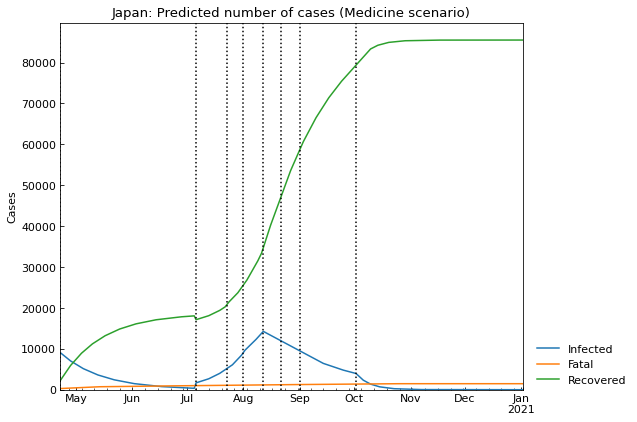

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,86983,1468,0,85515
252,2020-12-30,86983,1468,0,85515
253,2020-12-31,86983,1468,0,85515
254,2021-01-01,86983,1468,0,85515
255,2021-01-02,86983,1468,0,85515


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,8th_Rt
Main,14263,12Aug2020,335,1565,-
Medicine,14263,12Aug2020,0,1468,0.38


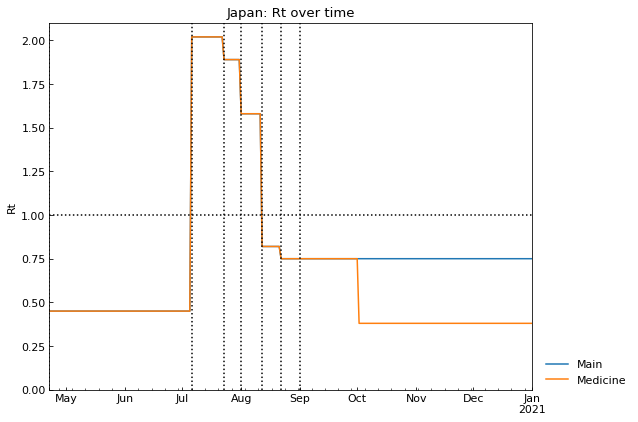

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

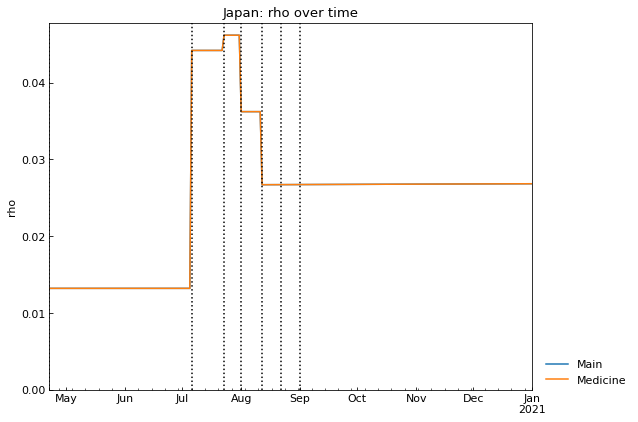

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

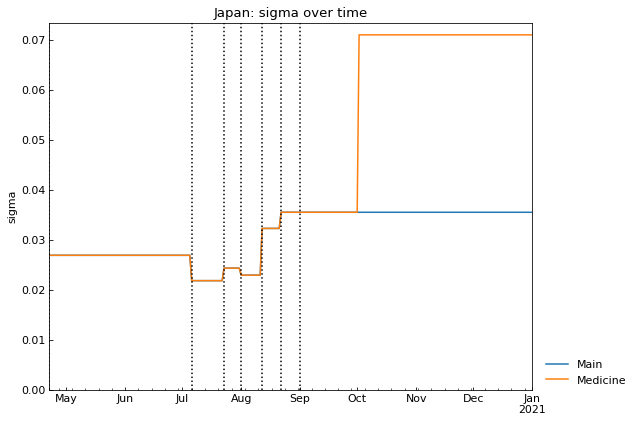

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

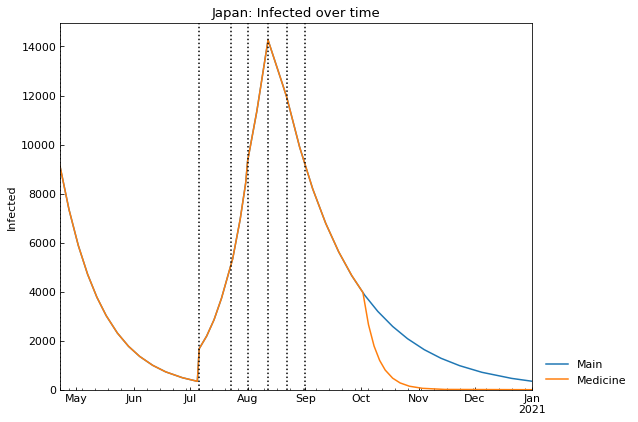

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")